<a href="https://colab.research.google.com/github/sodaianee/Analise-de-Dados---Soulcode/blob/main/AtividadeETL_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola: SoulCode Academy

Curso: Analista de Dados e Dashoard

Assunto: Atividade ETL

Professora: Franciane Rodrigues

Alunos(as): Daiane , Filipe , Leonardo S., Luciana e Matheus, Luana Reis.

In [1]:
!pip install gcsfs
# Passo 3: importando bibliotecas
import os
import pandas as pd
from google.cloud import storage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Importar o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CONFIGURANDO A CHAVE DE SEGURANCA - ACESSO O PROJETO
#serviceAccount = '/content/drive/MyDrive/dados_youtube/pjmdbluciana-f9445cb256cb.json'
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
#client = storage.Client()                                                 # Autenticação do cliente
#bucket = client.get_bucket('dados_mkt')                                       # nome do bucket
#bucket.blob('marketing_campaign.csv')                                           # nome do arquivo
#path = 'gs://dados_mkt/dados_brutos/marketing_campaign.csv'

NotFound: 404 GET https://storage.googleapis.com/storage/v1/b/dados_mkt?projection=noAcl&prettyPrint=false: The specified bucket does not exist.

In [5]:
# Abertura da base de dados
df = pd.read_csv('/content/drive/MyDrive/dados_youtube/marketing_campaign.csv - marketing_campaign.csv (1).csv')

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
#excluindo colunas que não quero usar
df.drop([
          'AcceptedCmp3',
          'AcceptedCmp4',
          'AcceptedCmp5',
          'AcceptedCmp1',
          'AcceptedCmp2' ], axis=1, inplace = True)

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


## **Alterando nomes das colunas**

In [9]:
# Criar um dicionário de mapeamento com os nomes novos e antigos das colunas
new_column_names = {
    'Year_Birth': 'Ano_Nascimento',
    'Education': 'Educação',
    'Marital_Status': 'Estado_Civil',
    'Income': 'Renda',
    'Kidhome': 'Filhos_em_Casa',
    'Teenhome': 'Adolescentes_em_Casa',
    'Dt_Customer': 'Data_Cliente',
    'Recency': 'Recência',
    'MntWines': 'Total_Compras_Vinhos',
    'MntFruits': 'Total_Compras_Frutas',
    'MntMeatProducts': 'Total_Compras_Carne',
    'MntFishProducts': 'Total_Compras_Peixe',
    'MntSweetProducts': 'Total_Compras_Produtos_Doce',
    'MntGoldProds': 'Total_Compras_Produtos_Ouro',
    'NumDealsPurchases': 'Núm_Deals_Compras',
    'NumWebPurchases': 'Núm_Compras_Online',
    'NumCatalogPurchases': 'Núm_Compras_Catálogo',
    'NumStorePurchases': 'Núm_Compras_Lojas',
    'NumWebVisitsMonth': 'Visitas_Web_Mês',
    'Complain': 'Reclamação',
    'Z_CostContact': 'Custo_Contato',
    'Z_Revenue': 'Receita_Contato',
    'Response': 'Resposta'
}

# Renomear as colunas usando o método 'rename'
df = df.rename(columns=new_column_names)

# Mostrar o DataFrame com os novos nomes das colunas
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


In [10]:
# Converter os valores da coluna 'Educação' para maiúsculas
df['Educação'] = df['Educação'].str.upper()

# Converter os valores da coluna 'Estado_Civil' para maiúsculas
df['Estado_Civil'] = df['Estado_Civil'].str.upper()

# Mostrar o DataFrame atualizado
#print(df)

In [11]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
0,5524,1957,GRADUATION,SINGLE,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,GRADUATION,SINGLE,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,GRADUATION,TOGETHER,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,GRADUATION,TOGETHER,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PHD,MARRIED,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUATION,MARRIED,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PHD,TOGETHER,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,GRADUATION,DIVORCED,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,MASTER,TOGETHER,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


## **Tradução**

In [12]:
#Verificando as informações que preenche a coluna estado_civil = para traduções
sorted(pd.unique(df['Estado_Civil']))

['ABSURD',
 'ALONE',
 'DIVORCED',
 'MARRIED',
 'SINGLE',
 'TOGETHER',
 'WIDOW',
 'YOLO']

In [13]:
traduzindo = {'ABSURD': 'DIVORCIADO',
 'ALONE' : 'SOLTEIRO',
 'DIVORCED' :  'DIVORCIADO',
 'MARRIED' :  'CASADO' ,
 'SINGLE' : 'SOLTEIRO',
 'TOGETHER' : 'UNIAO ESTAVEL',
 'WIDOW' : 'VIÚVO',
 'YOLO': 'SOLTEIRO'
}

In [14]:
# Substituir os valores na coluna - 'estado civil'
df['Estado_Civil']= df['Estado_Civil'].replace(traduzindo)

In [15]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
0,5524,1957,GRADUATION,SOLTEIRO,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,GRADUATION,SOLTEIRO,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,GRADUATION,UNIAO ESTAVEL,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,GRADUATION,UNIAO ESTAVEL,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PHD,CASADO,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUATION,CASADO,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PHD,UNIAO ESTAVEL,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,GRADUATION,DIVORCIADO,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,MASTER,UNIAO ESTAVEL,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


In [16]:
#Verificando quais informações preenche a coluna educação
sorted(pd.unique(df['Educação']))

['2N CYCLE', 'BASIC', 'GRADUATION', 'MASTER', 'PHD']

In [17]:
traduzindo2 = {
         '2N CYCLE': 'TECNOLOGO',
         'BASIC' : 'BÁSICO',
        'GRADUATION' :  'GRADUAÇÃO',
        'MASTER' :  'MESTRADO',
        'PHD': 'DOUTORADO'
}

In [18]:
# Substituir/traduzindo os valores na coluna - 'educação'
df['Educação']= df['Educação'].str.upper().replace(traduzindo2)

In [19]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
0,5524,1957,GRADUAÇÃO,SOLTEIRO,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,GRADUAÇÃO,SOLTEIRO,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,GRADUAÇÃO,UNIAO ESTAVEL,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,GRADUAÇÃO,UNIAO ESTAVEL,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,DOUTORADO,CASADO,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUAÇÃO,CASADO,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,DOUTORADO,UNIAO ESTAVEL,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,GRADUAÇÃO,DIVORCIADO,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


## **Nulo**

In [20]:
# Verificando valores nulos
df.isnull().sum()

ID                              0
Ano_Nascimento                  0
Educação                        0
Estado_Civil                    0
Renda                          24
Filhos_em_Casa                  0
Adolescentes_em_Casa            0
Data_Cliente                    0
Recência                        0
Total_Compras_Vinhos            0
Total_Compras_Frutas            0
Total_Compras_Carne             0
Total_Compras_Peixe             0
Total_Compras_Produtos_Doce     0
Total_Compras_Produtos_Ouro     0
Núm_Deals_Compras               0
Núm_Compras_Online              0
Núm_Compras_Catálogo            0
Núm_Compras_Lojas               0
Visitas_Web_Mês                 0
Reclamação                      0
Custo_Contato                   0
Receita_Contato                 0
Resposta                        0
dtype: int64

In [21]:
# colocar um filtrinho dos dados nulos
df[df.isnull().any(axis=1)]

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
10,1994,1983,GRADUAÇÃO,CASADO,NaN,1,0,15-11-2013,11,5,...,1,1,1,0,2,7,0,3,11,0
27,5255,1986,GRADUAÇÃO,SOLTEIRO,NaN,1,0,20-02-2013,19,5,...,362,0,27,0,0,1,0,3,11,0
43,7281,1959,DOUTORADO,SOLTEIRO,NaN,0,0,05-11-2013,80,81,...,39,1,1,3,4,2,0,3,11,0
48,7244,1951,GRADUAÇÃO,SOLTEIRO,NaN,2,1,01-01-2014,96,48,...,7,3,2,1,4,6,0,3,11,0
58,8557,1982,GRADUAÇÃO,SOLTEIRO,NaN,1,0,17-06-2013,57,11,...,6,2,2,0,3,6,0,3,11,0
71,10629,1973,TECNOLOGO,CASADO,NaN,1,0,14-09-2012,25,25,...,17,3,3,0,3,8,0,3,11,0
90,8996,1957,DOUTORADO,CASADO,NaN,2,1,19-11-2012,4,230,...,53,12,7,2,8,9,0,3,11,0
91,9235,1957,GRADUAÇÃO,SOLTEIRO,NaN,1,1,27-05-2014,45,7,...,1,1,1,0,2,7,0,3,11,0
92,5798,1973,MESTRADO,UNIAO ESTAVEL,NaN,0,0,23-11-2013,87,445,...,18,1,2,4,8,1,0,3,11,0
128,8268,1961,DOUTORADO,CASADO,NaN,0,1,11-07-2013,23,352,...,15,3,6,1,7,6,0,3,11,0


In [22]:
# Removendo linhas com valores nulos
df = df.dropna()

In [23]:
# checagem da eliminação dos dados nulos
df.isna().sum()

ID                             0
Ano_Nascimento                 0
Educação                       0
Estado_Civil                   0
Renda                          0
Filhos_em_Casa                 0
Adolescentes_em_Casa           0
Data_Cliente                   0
Recência                       0
Total_Compras_Vinhos           0
Total_Compras_Frutas           0
Total_Compras_Carne            0
Total_Compras_Peixe            0
Total_Compras_Produtos_Doce    0
Total_Compras_Produtos_Ouro    0
Núm_Deals_Compras              0
Núm_Compras_Online             0
Núm_Compras_Catálogo           0
Núm_Compras_Lojas              0
Visitas_Web_Mês                0
Reclamação                     0
Custo_Contato                  0
Receita_Contato                0
Resposta                       0
dtype: int64

In [24]:
# checagem
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2216 non-null   int64  
 1   Ano_Nascimento               2216 non-null   int64  
 2   Educação                     2216 non-null   object 
 3   Estado_Civil                 2216 non-null   object 
 4   Renda                        2216 non-null   float64
 5   Filhos_em_Casa               2216 non-null   int64  
 6   Adolescentes_em_Casa         2216 non-null   int64  
 7   Data_Cliente                 2216 non-null   object 
 8   Recência                     2216 non-null   int64  
 9   Total_Compras_Vinhos         2216 non-null   int64  
 10  Total_Compras_Frutas         2216 non-null   int64  
 11  Total_Compras_Carne          2216 non-null   int64  
 12  Total_Compras_Peixe          2216 non-null   int64  
 13  Total_Compras_Produtos_

## **Alterando Renda de float para Int**

In [25]:
# Convertendo o tipo de dados de float para int
df['Renda'] = df['Renda'].astype(int)

<ipython-input-25-cd1b92fbe72d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Renda'] = df['Renda'].astype(int)


In [26]:
df.dtypes

ID                              int64
Ano_Nascimento                  int64
Educação                       object
Estado_Civil                   object
Renda                           int64
Filhos_em_Casa                  int64
Adolescentes_em_Casa            int64
Data_Cliente                   object
Recência                        int64
Total_Compras_Vinhos            int64
Total_Compras_Frutas            int64
Total_Compras_Carne             int64
Total_Compras_Peixe             int64
Total_Compras_Produtos_Doce     int64
Total_Compras_Produtos_Ouro     int64
Núm_Deals_Compras               int64
Núm_Compras_Online              int64
Núm_Compras_Catálogo            int64
Núm_Compras_Lojas               int64
Visitas_Web_Mês                 int64
Reclamação                      int64
Custo_Contato                   int64
Receita_Contato                 int64
Resposta                        int64
dtype: object

In [27]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta
0,5524,1957,GRADUAÇÃO,SOLTEIRO,58138,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,GRADUAÇÃO,SOLTEIRO,46344,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,GRADUAÇÃO,UNIAO ESTAVEL,71613,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,GRADUAÇÃO,UNIAO ESTAVEL,26646,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,DOUTORADO,CASADO,58293,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUAÇÃO,CASADO,61223,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,DOUTORADO,UNIAO ESTAVEL,64014,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,GRADUAÇÃO,DIVORCIADO,56981,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,3,11,0


## **Verificando coluna duplicada**

In [28]:
#vERIFICANDO SE TEM 'ID'DUPLICADO, COMO O VALOR É TRUE, NÃO TEMOS COLUNAS DUPLICADAS
df.ID.is_unique

True

In [29]:
# Encontrar linhas duplicadas com base na coluna video_id organizado
duplicidade = df[df.duplicated(subset='ID', keep=False)]

In [30]:
# Organizar pela coluna coluna título
duplicidade.sort_values(by=['ID'])

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Total_Compras_Produtos_Ouro,Núm_Deals_Compras,Núm_Compras_Online,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta


# **Data**

In [61]:
#df['Data_Cliente'] = df['Data_Cliente'].str.replace('-')
# Converta a coluna 'Data' para o tipo de dados datetime
df['Data_Cliente'] = pd.to_datetime(df['Data_Cliente'], format='%d/%m/%Y')

# Formate a coluna 'Data' para o formato 'YYYY/MM/DD'
df['Data_Cliente'] = df['Data_Cliente'].dt.strftime('%Y-%m-%d')

<ipython-input-61-aa57426fc0a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data_Cliente'] = pd.to_datetime(df['Data_Cliente'], format='%d/%m/%Y')
<ipython-input-61-aa57426fc0a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data_Cliente'] = df['Data_Cliente'].dt.strftime('%Y-%m-%d')


In [62]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta,dia,mes,ano
0,5524,1957,GRADUAÇÃO,SOLTEIRO,58138,0,0,2012-09-04,58,635,...,10,4,7,0,3,11,1,4,SET,2012
1,2174,1954,GRADUAÇÃO,SOLTEIRO,46344,1,1,2014-03-08,38,11,...,1,2,5,0,3,11,0,8,MAR,2014
2,4141,1965,GRADUAÇÃO,UNIAO ESTAVEL,71613,0,0,2013-08-21,26,426,...,2,10,4,0,3,11,0,21,AGO,2013
3,6182,1984,GRADUAÇÃO,UNIAO ESTAVEL,26646,1,0,2014-02-10,26,11,...,0,4,6,0,3,11,0,10,FEV,2014
4,5324,1981,DOUTORADO,CASADO,58293,1,0,2014-01-19,94,173,...,3,6,5,0,3,11,0,19,JAN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUAÇÃO,CASADO,61223,0,1,2013-06-13,46,709,...,3,4,5,0,3,11,0,13,JUN,2013
2236,4001,1946,DOUTORADO,UNIAO ESTAVEL,64014,2,1,2014-06-10,56,406,...,2,5,7,0,3,11,0,10,JUN,2014
2237,7270,1981,GRADUAÇÃO,DIVORCIADO,56981,0,0,2014-01-25,91,908,...,3,13,6,0,3,11,0,25,JAN,2014
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245,0,1,2014-01-24,8,428,...,5,10,3,0,3,11,0,24,JAN,2014


In [63]:
df['Data_Cliente'] = pd.to_datetime(df['Data_Cliente'])

# Verificando a mudança
df.dtypes

<ipython-input-63-90545e45eb51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data_Cliente'] = pd.to_datetime(df['Data_Cliente'])


ID                                      int64
Ano_Nascimento                          int64
Educação                               object
Estado_Civil                           object
Renda                                   int64
Filhos_em_Casa                          int64
Adolescentes_em_Casa                    int64
Data_Cliente                   datetime64[ns]
Recência                                int64
Total_Compras_Vinhos                    int64
Total_Compras_Frutas                    int64
Total_Compras_Carne                     int64
Total_Compras_Peixe                     int64
Total_Compras_Produtos_Doce             int64
Total_Compras_Produtos_Ouro             int64
Núm_Deals_Compras                       int64
Núm_Compras_Online                      int64
Núm_Compras_Catálogo                    int64
Núm_Compras_Lojas                       int64
Visitas_Web_Mês                         int64
Reclamação                              int64
Custo_Contato                     

In [64]:
#Separando as datas clientes
df['dia'] = df.Data_Cliente.dt.day
df['mes'] = df.Data_Cliente.dt.month
df['ano'] = df.Data_Cliente.dt.year

<ipython-input-64-bd1493c6a7c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dia'] = df.Data_Cliente.dt.day
<ipython-input-64-bd1493c6a7c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df.Data_Cliente.dt.month
<ipython-input-64-bd1493c6a7c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [65]:
df

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta,dia,mes,ano
0,5524,1957,GRADUAÇÃO,SOLTEIRO,58138,0,0,2012-09-04,58,635,...,10,4,7,0,3,11,1,4,9,2012
1,2174,1954,GRADUAÇÃO,SOLTEIRO,46344,1,1,2014-03-08,38,11,...,1,2,5,0,3,11,0,8,3,2014
2,4141,1965,GRADUAÇÃO,UNIAO ESTAVEL,71613,0,0,2013-08-21,26,426,...,2,10,4,0,3,11,0,21,8,2013
3,6182,1984,GRADUAÇÃO,UNIAO ESTAVEL,26646,1,0,2014-02-10,26,11,...,0,4,6,0,3,11,0,10,2,2014
4,5324,1981,DOUTORADO,CASADO,58293,1,0,2014-01-19,94,173,...,3,6,5,0,3,11,0,19,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUAÇÃO,CASADO,61223,0,1,2013-06-13,46,709,...,3,4,5,0,3,11,0,13,6,2013
2236,4001,1946,DOUTORADO,UNIAO ESTAVEL,64014,2,1,2014-06-10,56,406,...,2,5,7,0,3,11,0,10,6,2014
2237,7270,1981,GRADUAÇÃO,DIVORCIADO,56981,0,0,2014-01-25,91,908,...,3,13,6,0,3,11,0,25,1,2014
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245,0,1,2014-01-24,8,428,...,5,10,3,0,3,11,0,24,1,2014


In [66]:
#Convertendo o tipo de dados de int  para srt
df['dia'] = df['dia'].astype(str)
df['mes'] = df['mes'].astype(str)
df['ano'] = df['ano'].astype(str)

<ipython-input-66-561c59695148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dia'] = df['dia'].astype(str)
<ipython-input-66-561c59695148>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df['mes'].astype(str)
<ipython-input-66-561c59695148>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [67]:
# Trocar valores especificos em colunas
df.loc[df.mes == '1', ['mes']] = 'JAN'
df.loc[df.mes == '2', ['mes']] = 'FEV'
df.loc[df.mes == '3', ['mes']] = 'MAR'
df.loc[df.mes == '4', ['mes']] = 'ABR'
df.loc[df.mes == '5', ['mes']] = 'MAI'
df.loc[df.mes == '6', ['mes']] = 'JUN'
df.loc[df.mes == '7', ['mes']] = 'JUL'
df.loc[df.mes == '8', ['mes']] = 'AGO'
df.loc[df.mes == '9', ['mes']] = 'SET'
df.loc[df.mes == '10', ['mes']] = 'OUT'
df.loc[df.mes == '11', ['mes']] = 'NOV'
df.loc[df.mes == '12', ['mes']] = 'DEZ'

## **Verificando Inconsistência**

In [68]:
for column in df.columns:
    # Verificando se a coluna contém valores inteiros
    if df[column].dtype == 'int':
        print(f"Valores inteiros únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

    # Verificando se a coluna contém valores de ponto flutuante
    elif df[column].dtype == 'float':
        print(f"Valores decimais únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)
    # Verificando se a coluna contém valores de texto (string)
    elif df[column].dtype == 'object':
        print(f"Valores de texto únicos na coluna '{column}':")
        print(sorted(df[column].unique()))
        print("-" * 50)  # Linha de separação

Valores inteiros únicos na coluna 'ID':
[0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, 55, 67, 73, 75, 78, 87, 89, 92, 113, 115, 123, 125, 143, 146, 153, 158, 164, 175, 176, 178, 182, 193, 194, 195, 199, 202, 203, 213, 217, 221, 231, 232, 234, 236, 238, 241, 246, 247, 252, 254, 255, 257, 263, 269, 271, 273, 274, 286, 291, 295, 304, 309, 310, 313, 322, 326, 332, 339, 340, 347, 359, 361, 367, 368, 375, 378, 380, 387, 405, 425, 433, 437, 448, 450, 451, 453, 454, 455, 456, 460, 466, 477, 486, 492, 498, 500, 503, 520, 521, 523, 524, 528, 531, 535, 538, 544, 550, 564, 569, 574, 577, 590, 591, 606, 607, 610, 615, 618, 624, 626, 635, 640, 641, 642, 663, 675, 679, 692, 697, 701, 702, 709, 713, 716, 736, 737, 738, 749, 760, 762, 771, 773, 793, 796, 798, 800, 803, 807, 810, 819, 821, 830, 832, 833, 837, 839, 843, 849, 850, 851, 868, 873, 879, 880, 891, 895, 898, 902, 905, 907, 916, 922, 933, 938, 940, 942, 944, 945, 946, 948, 954, 955, 961, 965, 966, 967, 968, 975, 977, 979, 983, 988, 999, 1000, 1

## **Integridade**

In [69]:
# Instalação do pacote pandera
!pip install pandera

In [70]:
# importando o pacote pandera
import pandera as pa

In [71]:
# verificar tipos e colunas de dados
df.dtypes

ID                                      int64
Ano_Nascimento                          int64
Educação                               object
Estado_Civil                           object
Renda                                   int64
Filhos_em_Casa                          int64
Adolescentes_em_Casa                    int64
Data_Cliente                   datetime64[ns]
Recência                                int64
Total_Compras_Vinhos                    int64
Total_Compras_Frutas                    int64
Total_Compras_Carne                     int64
Total_Compras_Peixe                     int64
Total_Compras_Produtos_Doce             int64
Total_Compras_Produtos_Ouro             int64
Núm_Deals_Compras                       int64
Núm_Compras_Online                      int64
Núm_Compras_Catálogo                    int64
Núm_Compras_Lojas                       int64
Visitas_Web_Mês                         int64
Reclamação                              int64
Custo_Contato                     

In [72]:
# Definição do esquema de validação
schema = pa.DataFrameSchema({'ID': pa.Column(pa.Int),
                             'Ano_Nascimento': pa.Column(pa.Int),
                             'Educação': pa.Column(pa.String),
                             'Estado_Civil': pa.Column(pa.String),
                             'Renda': pa.Column(pa.Int),
                             'Filhos_em_Casa': pa.Column(pa.Int),
                             'Adolescentes_em_Casa': pa.Column(pa.Int),
                              'Data_Cliente': pa.Column(pa.DateTime),
                             'Recência': pa.Column(pa.Int),
                              'Total_Compras_Vinhos': pa.Column(pa.Int),
                              'Total_Compras_Frutas': pa.Column(pa.Int),
                             'Total_Compras_Carne': pa.Column(pa.Int),
                             'Total_Compras_Peixe': pa.Column(pa.Int),
                              'Total_Compras_Produtos_Doce': pa.Column(pa.Int),
                              'Total_Compras_Produtos_Ouro': pa.Column(pa.Int),
                              'Núm_Deals_Compras': pa.Column(pa.Int),
                              'Núm_Compras_Online': pa.Column(pa.Int),
                              'Núm_Compras_Catálogo': pa.Column(pa.Int),
                              'Núm_Compras_Lojas': pa.Column(pa.Int),
                              'Visitas_Web_Mês': pa.Column(pa.Int),
                              'Reclamação': pa.Column(pa.Int),
                              'Custo_Contato': pa.Column(pa.Int),
                              'Receita_Contato': pa.Column(pa.Int),
                              'Resposta': pa.Column(pa.Int),
                              'dia': pa.Column(pa.String),
                              'mes': pa.Column(pa.String),
                              'ano': pa.Column(pa.String),
                                                })

In [73]:
# Validar o DataFrame
schema.validate(df)

,ID,Ano_Nascimento,Educação,Estado_Civil,Renda,Filhos_em_Casa,Adolescentes_em_Casa,Data_Cliente,Recência,Total_Compras_Vinhos,...,Núm_Compras_Catálogo,Núm_Compras_Lojas,Visitas_Web_Mês,Reclamação,Custo_Contato,Receita_Contato,Resposta,dia,mes,ano
0,5524,1957,GRADUAÇÃO,SOLTEIRO,58138,0,0,2012-09-04,58,635,...,10,4,7,0,3,11,1,4,SET,2012
1,2174,1954,GRADUAÇÃO,SOLTEIRO,46344,1,1,2014-03-08,38,11,...,1,2,5,0,3,11,0,8,MAR,2014
2,4141,1965,GRADUAÇÃO,UNIAO ESTAVEL,71613,0,0,2013-08-21,26,426,...,2,10,4,0,3,11,0,21,AGO,2013
3,6182,1984,GRADUAÇÃO,UNIAO ESTAVEL,26646,1,0,2014-02-10,26,11,...,0,4,6,0,3,11,0,10,FEV,2014
4,5324,1981,DOUTORADO,CASADO,58293,1,0,2014-01-19,94,173,...,3,6,5,0,3,11,0,19,JAN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,GRADUAÇÃO,CASADO,61223,0,1,2013-06-13,46,709,...,3,4,5,0,3,11,0,13,JUN,2013
2236,4001,1946,DOUTORADO,UNIAO ESTAVEL,64014,2,1,2014-06-10,56,406,...,2,5,7,0,3,11,0,10,JUN,2014
2237,7270,1981,GRADUAÇÃO,DIVORCIADO,56981,0,0,2014-01-25,91,908,...,3,13,6,0,3,11,0,25,JAN,2014
2238,8235,1956,MESTRADO,UNIAO ESTAVEL,69245,0,1,2014-01-24,8,428,...,5,10,3,0,3,11,0,24,JAN,2014


## **Salvando os dados tratados**

In [74]:
#Dados tratados carregados no Google Drive
df.to_csv('/content/drive/MyDrive/dados_youtube/marketing_tratado.csv')

In [75]:
# Dados carregados no Google Cloud
#df.to_csv('gs://dados_mkt/dados_tratados/marketing_tratado.csv', index=True)

## **Gráficos**

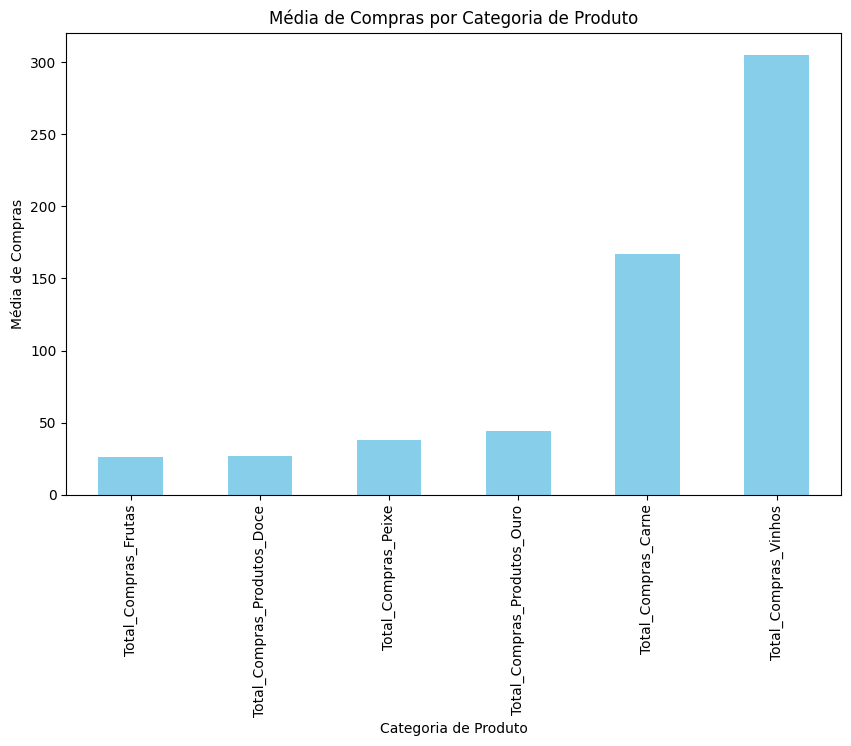

In [76]:
# Gráfico de barras para a média de compras por categoria de produto
categories = ['Total_Compras_Vinhos', 'Total_Compras_Frutas', 'Total_Compras_Carne',
              'Total_Compras_Peixe', 'Total_Compras_Produtos_Doce', 'Total_Compras_Produtos_Ouro']

plt.figure(figsize=(10, 6))
df[categories].mean().sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Categoria de Produto')
plt.ylabel('Média de Compras')
plt.title('Média de Compras por Categoria de Produto')
plt.show()

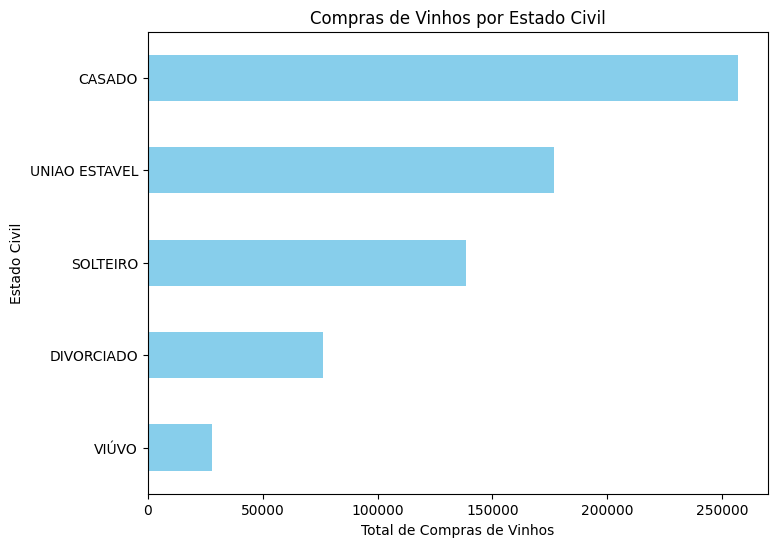

In [77]:
#Gráfico 2: Total de Compras de Vinhos por Estado Civil
# Gráfico de barras horizontais para as compras de vinho por estado civil
plt.figure(figsize=(8, 6))
df.groupby('Estado_Civil')['Total_Compras_Vinhos'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Total de Compras de Vinhos')
plt.ylabel('Estado Civil')
plt.title('Compras de Vinhos por Estado Civil')
plt.show()

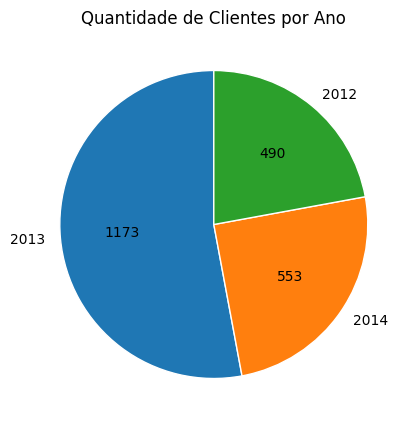

In [78]:
# Grafico de setores
# Quantidade de Cliente nos anos 2012, 2013, 2014

# Contar a quantidade de clientes por ano
clientes_ano = df['ano'].value_counts()
plt.figure(figsize=(5,5))

# Imprimindo o gráfico de pizza
clientes_ano.plot.pie(autopct=lambda p: '{:.0f}'.format(p * clientes_ano.sum() / 100),
                       startangle=90,
                       wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  )

#Adicionando o título do gráfico
plt.title('Quantidade de Clientes por Ano')
plt.ylabel('')
plt.show()

In [83]:
#ANO 2012

#Verificando a data de inicio dos dados cadastrados no ano de 2012
print('2012\n')
data_inicio_2012 = df[df['ano'] == 2012]['Data_Cliente'].min()
print(f"Data de Início dos Dados em 2012: {data_inicio_2012}")

#Verificando a data final dos dados cadastrados no ano de 2012
data_final_2012 = df[df['ano'] == 2012]['Data_Cliente'].max()
print(f"Data de Início dos Dados em 2012: {data_final_2012}")
print('--------------------------------------------------')
#ANO 2013

#Verificando a data de inicio dos dados cadastrados no ano de 2013
print('2013\n')
data_inicio_2013 = df[df['ano'] == 2013]['Data_Cliente'].min()
print(f"Data de Início dos Dados em 2013: {data_inicio_2013}")

#Verificando a data final dos dados cadastrados no ano de 2013
data_final_2013 = df[df['ano'] == 2013]['Data_Cliente'].max()
print(f"Data de Início dos Dados em 2013: {data_final_2013}")
print('--------------------------------------------------')
#ANO 2014

#Verificando a data de inicio dos dados cadastrados no ano de 2014
print('2014\n')
data_inicio_2014 = df[df['ano'] == 2014]['Data_Cliente'].min()
print(f"Data de Início dos Dados em 2014: {data_inicio_2014}")

#Verificando a data final dos dados cadastrados no ano de 2014
data_final_2014 = df[df['ano'] == 2014]['Data_Cliente'].max()
print(f"Data de Início dos Dados em 2014: {data_final_2014}")

2012

Data de Início dos Dados em 2012: NaT
Data de Início dos Dados em 2012: NaT
--------------------------------------------------
2013

Data de Início dos Dados em 2013: NaT
Data de Início dos Dados em 2013: NaT
--------------------------------------------------
2014

Data de Início dos Dados em 2014: NaT
Data de Início dos Dados em 2014: NaT
